In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import horton
horton.log.set_level(0)

Objective: trace out AC path from C to Li2 at Li2 bond distance (2.6 A). Follow density differences
$$\rho_f - \rho_i = \int_0^1d\lambda\frac{\partial\rho}{\partial\lambda} = \int_0^1d\lambda\sum_I\frac{\partial\rho}{\partial Z_I}\frac{\partial Z_I}{\partial\lambda} = \sum_I \Delta Z_I\int_0^1d\lambda\frac{\partial\rho}{\partial Z_I} \equiv \sum_I \rho_I$$
If the reference is a single atom, then this gives $\rho_I(r)$.

In [10]:
def get_evaluation_points():
    """ Calculate the required integral points from C to Li2"""
    ret = []
    for z1 in np.linspace(6, 3, 31):
        z2 = 6-z1
        ret.append({'Z1': z1, 'Z2': z2, 'bond': 2.6*horton.angstrom})
    return pd.DataFrame(ret)
evalpoints = get_evaluation_points()

In [11]:
def get_carbon_grid(bond):
    coordinates = np.array([[0.0, 0.0, -bond/2.], [0.0, 0.0, bond/2.]])
    return horton.BeckeMolGrid(coordinates, np.array([6, 6]), np.array([6.,6.]), 'insane', mode='keep', random_rotate=False)
def build_grid_cache(evalpoints):
    return {_: get_carbon_grid(_) for _ in evalpoints.bond.unique()}
grid_cache = build_grid_cache(evalpoints)

In [41]:
def evaluate_point(z1, z2, bond, gridpoints):
    """ Run Gaussian to do this"""
res = evaluate_point(3.2, 2.8, 4.9, np.vstack((np.zeros(100),np.zeros(100), np.linspace(-5, 5, 100))).T.copy())

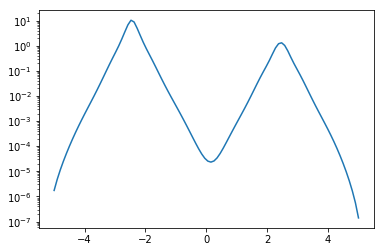

In [42]:
import matplotlib.pyplot as plt
plt.semilogy(np.linspace(-5, 5, 100), res['density'])